# BERT and Word Sense Disambiguation

In computational linguistics, word-sense disambiguation (WSD) is an open problem concerned with identifying which sense of a word is used in a sentence. Imagine a bank of water, or a bank which accepts deposits. You can distinguish these two "banks" easily because you understand the context of the sentence which is used for it. What if we want to distinguish senses of a word automatically? You have learned about word embeddings and W2V from the [first assignment](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing). W2V extracts a unique vector that is a representation of that word. That is sufficiant we are going distinguish between two different words, such as "Hi" and "Bye"; but we cannot purely depend on it when we want to distinguish between a specific word with several senses.

Researchers have developed several methods for tackling this issue. One of these techniques named DeConf is proposed by your professor, Dr. Pilehvar. He tackled this problem by de-conflating the representations of words based on the deep knowledge it derives from a semantic network. You can read the complete paper [here](https://arxiv.org/abs/1608.01961). Besides, A full survey about WSD is available [here](https://www.researchgate.net/publication/220566219_Word_Sense_Disambiguation_A_Survey).

In this task, we are going to distinguish between two senses of the word (noun) "bat" using [BERT](https://arxiv.org/abs/1810.04805). BERT is a context-aware language representation model that can produce different vectors for a specific word according to the context of the sentence.

According to [Cambridge dictionary](https://dictionary.cambridge.org/dictionary/english/bat), "bat" has two meanings:
1. A specially shaped piece of wood used for hitting the ball in some games (cricket bat)

2. A small animal like a mouse with wings that flies at night (mammal bat)



We use two simple datasets for our task. First, cricketbat.txt, which contains few sentences referring to bat used in cricket sport, and second, vampirebat.txt, which contains few sentences referring to the mammal bird bat. These datasets are available in [this](https://github.com/omkar-dsd/mini_projects/tree/master/word_sense_disambiuation) repository, which is used for another WSD approach using [Wordnet](https://wordnet.princeton.edu/). The full explanation of WSD using this method is available [here](https://towardsdatascience.com/a-simple-word-sense-disambiguation-application-3ca645c56357).

In [0]:
!git clone https://github.com/omkar-dsd/mini_projects.git

# Download and load the datasets here. Then, separate and lower the sentences and insert them in a list.

Cloning into 'mini_projects'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [0]:
cricket_bat = open('/content/mini_projects/word_sense_disambiuation/cricketbat.txt').readlines()
vampire_bat = open('/content/mini_projects/word_sense_disambiuation/vampirebat.txt').readlines()
cricket_bat = list(map(str.lower,cricket_bat))
vampire_bat = list(map(str.lower,vampire_bat))


Now, we use BERT to encode words of these datasets. You can use [this](https://github.com/hanxiao/bert-as-service) repository to extract word embeddings of the sentences. Use BERT-Base, Uncased as your pre-trained BERT model. Then, insert the vectors of all words with root "bat" in another list for each dataset.

In [0]:
!pip install bert-serving-server  # server
!pip install bert-serving-client
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
!unzip wwm_uncased_L-24_H-1024_A-16.zip
!ls

     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 33.9MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=969fe84ee64d24fb500d7b7e68c1bb486bcd3b6e3ed89df5c0cbd40d0d5ab9ef
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: pyzmq 17.0.0
    Uninstalling pyzmq-17.0.0:
      Successfully uninstalled pyzmq-17.0.0


--2019-12-29 10:28:24--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1248381879 (1.2G) [application/zip]
Saving to: ‘wwm_uncased_L-24_H-1024_A-16.zip’

wwm_uncased_L-24_H- 100%[===================>]   1.16G  67.6MB/s    in 20s     

2019-12-29 10:28:45 (58.9 MB/s) - ‘wwm_uncased_L-24_H-1024_A-16.zip’ saved [1248381879/1248381879]

Archive:  wwm_uncased_L-24_H-1024_A-16.zip
   creating: wwm_uncased_L-24_H-1024_A-16/
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_uncased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_uncased

In [0]:
# !unzip ./cased_L-24_H-1024_A-16.zip.3
# !htop
!ls

_about.txt  fa.txt	 mini_projects	sample_data
asg03	    fra-eng.zip  model.png	wwm_uncased_L-24_H-1024_A-16
downloads   fra.txt	 s2s.h5		wwm_uncased_L-24_H-1024_A-16.zip


In [0]:
# !bert-serving-start  -model_dir=./cased_L-24_H-1024_A-16 > out.file 2>&1 &
# !nohup bert-serving-start -pooling_strategy NONE -max_seq_len=1000 -model_dir=./cased_L-24_H-1024_A-16  > out.file 2>&1 & 

!nohup bert-serving-start  -pooling_strategy NONE -show_tokens_to_client -max_seq_len NONE  -model_dir=./wwm_uncased_L-24_H-1024_A-16 > out.file 2>&1 &
# !nohup bert-serving-start -model_dir=./cased_L-24_H-1024_A-16 > out.file 2>&1 &



In [0]:
!ls
!kill bert-serving-start

_about.txt   fra.txt	    sample_data
asg03	     mini_projects  wwm_uncased_L-24_H-1024_A-16
downloads    model.png	    wwm_uncased_L-24_H-1024_A-16.zip
fa.txt	     out.file
fra-eng.zip  s2s.h5
/bin/bash: line 0: kill: bert-serving-start: arguments must be process or job IDs


In [0]:
from bert_serving.client import BertClient
bc = BertClient()
print(bc.encode(['First do it', 'then do it right', 'then do it better']).shape)


(3, 6, 1024)


/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


In [0]:
# Use bert to extract the embeddings of "bat"s.
import numpy as np
a = bc.encode(cricket_bat, show_tokens=True)
vectors = a[0][0]
tokens = a[1][0]
cricket_bat_vectors = []
for i,token in enumerate(tokens):
  if 'bat' in token:
    cricket_bat_vectors.append(vectors[i])
all_cricket_bat_vectors = cricket_bat_vectors
cricket_bat_vectors = np.sum(np.array(cricket_bat_vectors)/len(cricket_bat_vectors),axis=0)
print(cricket_bat_vectors.shape)

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


(1024,)


In [0]:
a = bc.encode(vampire_bat, show_tokens=True)
import numpy as np
vectors = a[0][0]
tokens = a[1][0]
vampire_bat_vectors = []
for i,token in enumerate(tokens):
  if 'bat' in token:
    vampire_bat_vectors.append(vectors[i])
all_vampire_bat_vectors = vampire_bat_vectors
vampire_bat_vectors = np.sum(np.array(vampire_bat_vectors)/len(vampire_bat_vectors),axis=0)
print(vampire_bat_vectors.shape)

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


(1024,)


In [0]:
from numpy import linalg as LA
def check_bat(sentence):
  a = bc.encode([sentence], show_tokens=True)
  vectors = a[0][0]
  tokens = a[1][0]
  bat_vectors = []
  for i,token in enumerate(tokens):
    if 'bat' in token:
      bat_vectors.append(vectors[i])
  bat_vectors = np.sum(np.array(bat_vectors)/len(bat_vectors),axis=0)
  bat_diff_vampire = LA.norm((bat_vectors - vampire_bat_vectors))
  bat_diff_cricket = LA.norm((bat_vectors - cricket_bat_vectors))
  print(bat_diff_vampire)
  print(bat_diff_cricket)
  if(bat_diff_cricket > bat_diff_vampire):
    return bat_vectors,"mammal bat"
  else:
    return bat_vectors,"cricket bat"



Now, you need to find a specific embedding for each sense of the "bat". A simple approach is averaging all "bat" vectors of each document. Then, you should calculate the distance between the BERT embedding of "bat" in our test cases with your document "bat"s. 

Hint: [This](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) function may be useful.

In [0]:
test_cases = ["bats are mammals","bats breed","bats are used to play cricket", "which bat has handle?","bats can fly"]
test_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

your_labels = [x[1] for x in list(map(check_bat,test_cases))]
test_vector = [x[0] for x in list(map(check_bat,test_cases))]
 
print(your_labels)
#fill your labels with the "bat" with minimum distance to the test case

assert test_labels==your_labels

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


15.54059
19.12995
21.170086
21.637732
20.440533
16.299915
21.35244
18.051403
18.767963
19.884918
15.54059
19.12995
21.170086
21.637732
20.440533
16.299915
21.35244
18.051403
18.767963
19.884918
['mammal bat', 'mammal bat', 'cricket bat', 'cricket bat', 'mammal bat']


Hmm... It makes sense. Let's see what you produced. You should use [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the 768 dimensions of BERT embeddings into just 2 dimensions. Then, use matplotlib to visualize them.

(1024,)
[0.016137   0.22427905]
TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)
16


No handles with labels found to put in legend.


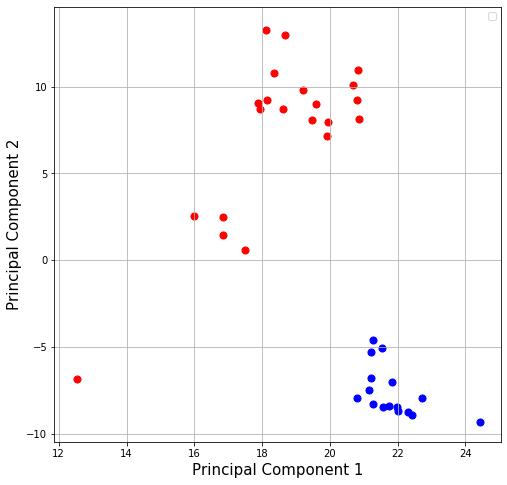

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# make a list of embeddings like this: [ALL_CRICKET_BAT_EMBEDDINGS,ALL_MAMMAL_BAT_EMBEDDINGS,AVERAGE_CRICKET_BAT_EMBEDDING,AVERAGE_MAMMAL_BAT_EMBEDDING,ALL_TEST_BAT_EMBEDDINS]
vec_all = all_cricket_bat_vectors+all_vampire_bat_vectors+ [cricket_bat_vectors]+[vampire_bat_vectors]+test_vector
print(np.array(vec_all[2]).shape)
pca = TruncatedSVD(n_components=2)
principalComponents = pca.fit_transform(vec_all)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component 1', 'principal component 2'])
print(pca)


# make a colors list. use "b" for CRICKET_BATs, "r" for MAMMAL_BATs
colors =[]
colors += ["b"] * len(all_cricket_bat_vectors)
colors += ["r"] * len(all_vampire_bat_vectors)
print(len(all_cricket_bat_vectors))
#extract pc1 and pc2 for document bats
pc1_document=principalDf.get('principal component 1').tolist()[:-7]
pc2_document=principalDf.get('principal component 2').tolist()[:-7]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_document,pc2_document, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

It seems that despite this considerable compression, the clusters are distinguishable. Now, for the last part, visualize the average vectors and the test case vectors.

No handles with labels found to put in legend.


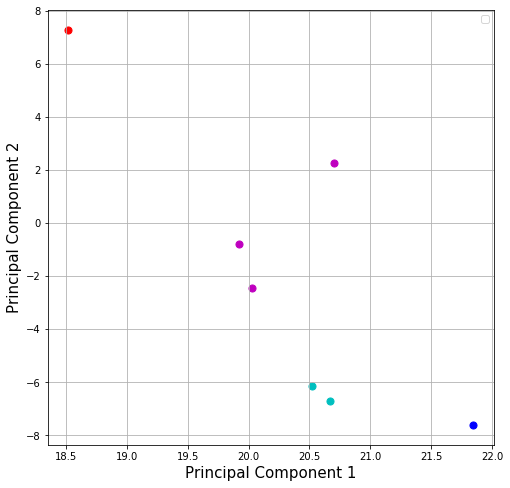

In [0]:
#extract pc1 and pc2 for average and test bats
pc1_remainings=principalDf.get('principal component 1').tolist()[-7:]
pc2_remainings=principalDf.get('principal component 2').tolist()[-7:]

colors =["b","r","m","m","c","c","m"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_remainings,pc2_remainings, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()